In [31]:
import pandas as pd

data = pd.read_csv('pratices/BankChurners.csv')
pd.set_option('display.max_columns', 24)
data.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": 'n_flag_1',
"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2" : "n_flag_2" }, inplace=True)
data.drop('CLIENTNUM', axis=1, inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,n_flag_1,n_flag_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [32]:
data.Attrition_Flag.value_counts()#normalize=True)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

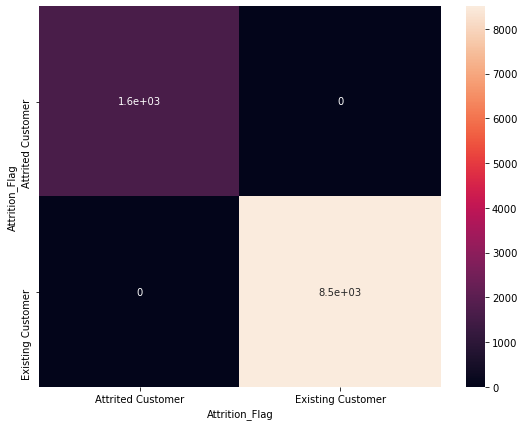

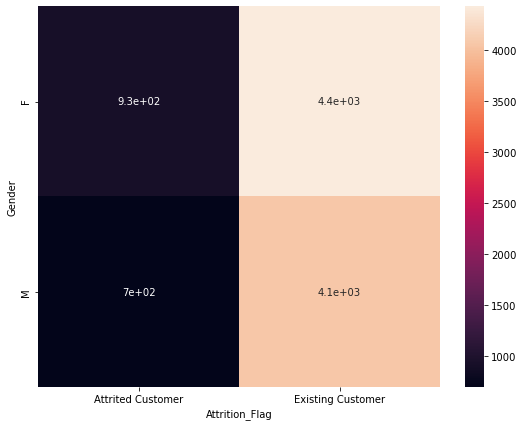

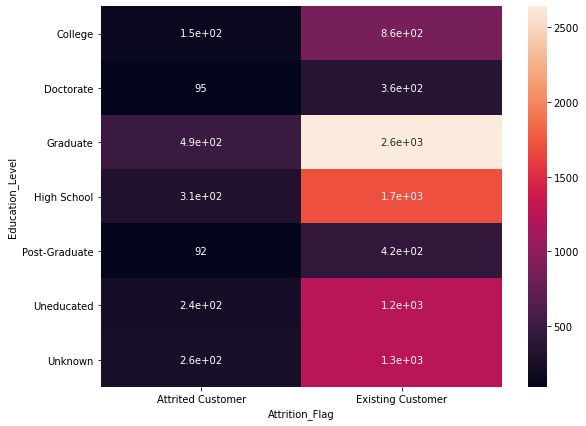

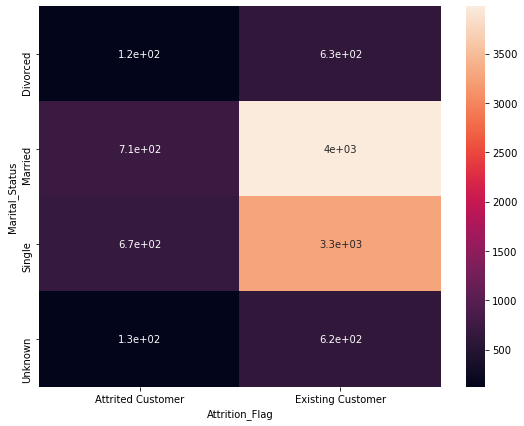

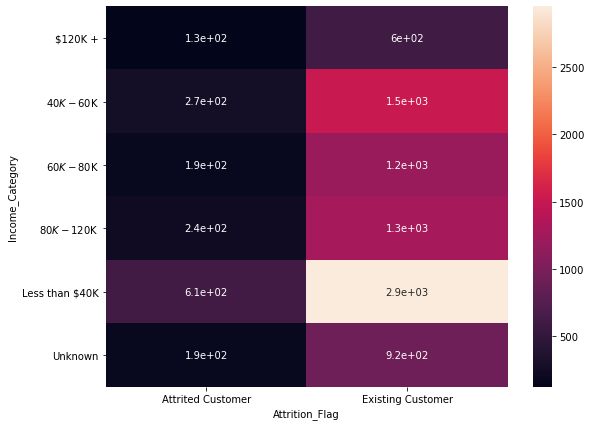

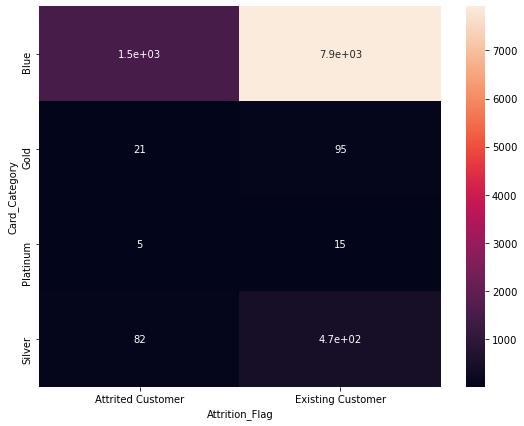

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data.select_dtypes('object'):
    x = plt.figure(figsize=(9,7))
    sns.heatmap(pd.crosstab(data[i], data['Attrition_Flag']), annot=True)


<AxesSubplot:>

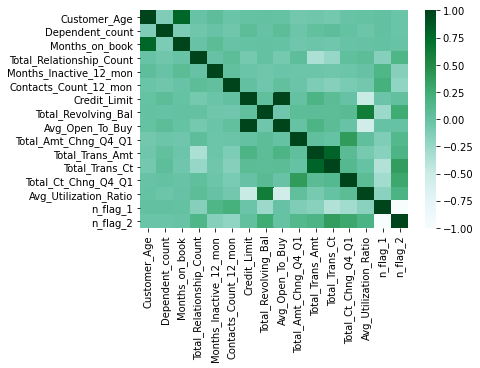

In [34]:
sns.heatmap(data.corr(), cmap='BuGn')

## Preprocessing now

In [35]:
# importation of dataset



In [36]:
class Preprocess :
    
    def __ini__(self):
        pass
    
    def __repr__(self):
        return 'Here we are in class Preprocessing \nType "dir(Preprocess)", to see all alternatives'
    
    ## Preprocess : Splitting in train and test sets
    def split(self, data):
        from sklearn.model_selection import train_test_split
        
        self.X = data.drop('Attrition_Flag', axis=1)
        self.Y = data['Attrition_Flag']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.Y, random_state=0, train_size=0.9)
        print('Train : ',self.X_train.shape,'\nTest : ', self.X_test.shape)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    ## Preprocess : dealing with missing values
    def missings(self, data):
            # if to delete data use dropna from pandas
        data = data.dropna(axis=1)
        return data
            # if need to fill NA values use impute methods
        #from sklearn.impute import SimpleImputer
        #self.model = SimpleImputer(strategy='most_frequent')
        #self.model.fit(data)
        #return self.model.transform(data)
        
    ## Preprocess : converting string to int
    def encoder(self, data):
        for self.dt in data.select_dtypes("object"):
            data[self.dt] = data[self.dt].astype('category').cat.codes
        return data
            # if need for onehotencoding 
        #from sklearn.preprocessing import OneHotEncoder
        #self.model = OneHotEncoder()
        #for dt in data.select_dtypes(include='object'):
            #data[dt] = self.model.fit_transform(data[dt])
    
    ## Preprocess :  Standardisation
    def standar(self, data=None):
        from sklearn.preprocessing import StandardScaler
        import pandas as pd
        
        self.model = StandardScaler()
        return pd.DataFrame(self.model.fit_transform(data), columns=data.columns)
    
    ## Preprocess : handling outilers and inliers
    def outliers(self,data=None):
        from sklearn.ensemble import IsolationForest
            #  in case of needof PCA
        #from sklearn.decomposition import PCA
        #self.model = PCA(n_components=0.95)
        #self.model.fit(data)
        #return self.model.transform(data)
        
        self.model = IsolationForest(contamination= 0.02)
        return self.model
    
    ## Preprocess : in case of need of polynomialFeatures
    def poly_features(self, degre=2):
        from sklearn.preprocessing import PolynomialFeatures
        
        self.model = PolynomialFeatures(degre)
        return self.model
    
   
    ## Preprocess : regression model just for testing preprocess
    def regression(self, model=None, X_train=None, y_train=None, X_test=None, y_test=None):
        
        self.model = model
        self.model.fit(X_train, y_train)
        return self.model.score(X_test, y_test)
        
    
    ## Preprocess : classification model just for testing preprocess
    def classification(self, model=None,  X_train=None, y_train=None, X_test=None, y_test=None):
        
        self.model = model
        self.model.fit(X_train, y_train)
        return self.model.score(X_test, y_test)
    
    def curves(self,model=None, X_train=None, y_train=None):
        from sklearn.model_selection import learning_curve
        import numpy as np
        import matplotlib.pyplot as plt
        
        N, train, val = learning_curve(model, X_train, y_train, train_sizes=np.linspace(.1,1.,10))
        plt.plot(N, train.mean(axis=1), label="training")
        plt.plot(N, val.mean(axis=1), label="validation")
        plt.scatter([],[], label=model.__class__.__name__)
        plt.legend()
        

In [37]:
data_prepro = data.copy()
prepro = Preprocess()


In [54]:
prepro.encoder(data_prepro)


from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05)
model.fit(data_prepro)
data_prepro["Anomaly"] = model.predict(data_prepro)
data_prepro.head()
data_prepro.shape
data_prepro_index = data_prepro[data_prepro['Anomaly'] ==-1]

In [55]:
data_prepro = data_prepro.drop(data_prepro_index.index.values.tolist(), axis=0)
data_prepro.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,n_flag_1,n_flag_2,Anomaly
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,1
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,1
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,1
5,1,44,1,2,2,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994,1
8,1,37,1,3,5,2,2,0,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996,1


In [56]:
X_train, X_test, y_train, y_test = prepro.split(data_prepro)

X_test.head()

Train :  (8225, 22) 
Test :  (914, 22)


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,n_flag_1,n_flag_2,Anomaly
7293,56,0,4,6,1,4,0,44,3,3,2,1707.0,0,1707.0,0.683,4846,80,0.569,0.000,0.000207,0.99979,1
4281,55,0,0,2,1,4,0,40,4,3,4,1513.0,725,788.0,0.791,4042,72,0.714,0.479,0.000443,0.99956,1
1792,58,1,4,3,1,1,0,47,6,3,4,7803.0,1885,5918.0,0.531,1199,25,0.316,0.242,0.000526,0.99947,1
981,46,1,5,3,1,1,3,28,5,1,3,18797.0,2158,16639.0,0.446,1364,40,0.538,0.115,0.000084,0.99992,1
7158,56,0,1,0,1,5,0,36,6,2,2,4263.0,0,4263.0,0.640,4876,70,1.188,0.000,0.000104,0.99990,1


Linear  :  1.0
Svm_simple  :  0.9004376367614879
Neighbors  :  0.9245076586433261
EnsembleForest  :  1.0
EnsembleAdaboost  :  1.0
Tree  :  1.0
Naives_gnb  :  0.9978118161925602
Sgdclass  :  0.9004376367614879


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Svm_linear  :  0.975929978118162


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

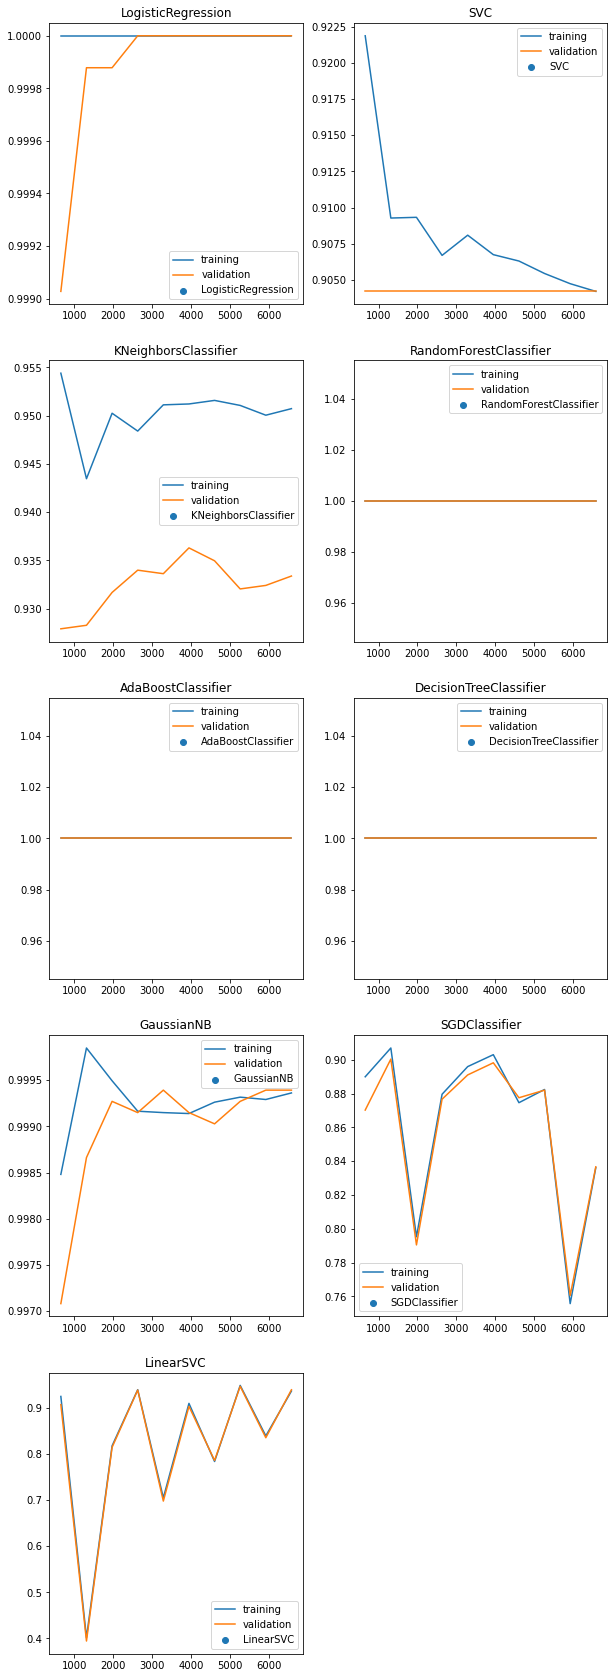

In [57]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Linear": LogisticRegression(max_iter=9000, random_state=42),
    "Svm_simple" : SVC(),
    "Neighbors" : KNeighborsClassifier(),
    "EnsembleForest" : RandomForestClassifier(random_state=42),
    "EnsembleAdaboost" : AdaBoostClassifier(random_state=42),
    "Tree" : DecisionTreeClassifier(random_state=42), 
    "Naives_gnb" : GaussianNB(),
    "Sgdclass" : SGDClassifier(),
    "Svm_linear" : LinearSVC(max_iter=9000, random_state=42)
}

plt.figure(figsize=(10,30))

for (name,model), i in zip(models.items(), range(1, 10)):  
    print(name, ' : ', prepro.classification(model, X_train, y_train, X_test, y_test))
    plt.subplot(5, 2, i)
    prepro.curves(model, X_train, y_train)
    plt.title(model.__class__.__name__)

In [58]:
print('hello word')

hello word


## Modelisation 

Score Accuracy :  0.9649890590809628
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        91
           1       0.97      1.00      0.98       823

    accuracy                           0.96       914
   macro avg       0.96      0.84      0.89       914
weighted avg       0.96      0.96      0.96       914
 
Matrix de confusion : 


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<AxesSubplot:>

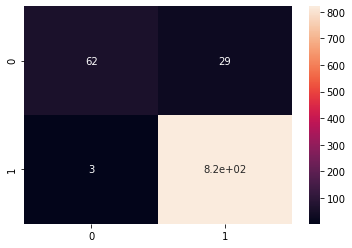

In [63]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

model = LinearSVC(max_iter=5000)

model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("Score Accuracy : ", model.score(X_test, y_test))
print(classification_report(y_test, prediction),"\nMatrix de confusion : ")
sns.heatmap(confusion_matrix(y_test, prediction), annot=True)


In [64]:
# pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

pipeline = make_pipeline(StandardScaler(), model)

grid = GridSearchCV(pipeline, param_grid={}, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearsvc',
                                        LinearSVC(max_iter=5000))]),
             param_grid={})

In [66]:
grid.best_score_

1.0

<function Pipeline.score at 0x000001E888C3A700>


<AxesSubplot:>

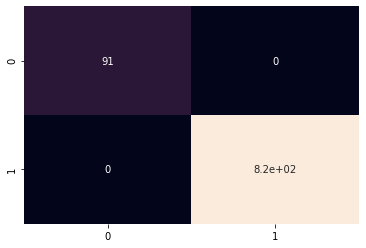

In [68]:
model = grid.best_estimator_
prediction = model.predict(X_test)

classification_report(y_test, prediction)
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cbar=False)